In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
%load_ext autoreload
%autoreload 2

In [12]:
from football_modelling.data import load_wyscout_match_data

data_df = load_wyscout_match_data(country="Germany", raw=True)


In [13]:
data_df


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85,179896445
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85,179896446
...,...,...,...,...,...,...,...,...,...,...,...,...
519402,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",15317,"[{'y': 9, 'x': 91}, {'y': 6, 'x': 90}]",2517044,Duel,2463,2H,2825.097992,11,251206867
519403,1,Ground defending duel,"[{'id': 703}, {'id': 1801}]",14804,"[{'y': 94, 'x': 10}, {'y': 95, 'x': 0}]",2517044,Duel,2451,2H,2825.519102,12,251206788
519404,1,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",15317,"[{'y': 6, 'x': 90}, {'y': 5, 'x': 100}]",2517044,Duel,2463,2H,2826.053788,11,251206868
519405,8,Simple pass,[{'id': 1802}],14804,"[{'y': 95, 'x': 0}, {'y': 93, 'x': 5}]",2517044,Pass,2451,2H,2828.080925,85,251206790


In [16]:
# Identify the goals and add them to a column
shots = data_df[data_df["subEventName"] == "Shot"]
shots.assign(Goal=0)
for i, shot in shots.iterrows():
    for shottags in shot["tags"]:
        # Tags contain that its a goal
        if shottags["id"] == 101:  #
            shots.at[i, "Goal"] = 1


In [17]:
shots


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Goal
104,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",209091,"[{'y': 66, 'x': 83}, {'y': 0, 'x': 0}]",2516739,Shot,2444,1H,247.703507,100,179896573,NaN
178,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",134383,"[{'y': 59, 'x': 95}, {'y': 0, 'x': 0}]",2516739,Shot,2444,1H,529.393731,100,179896639,1.0
216,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",105619,"[{'y': 66, 'x': 91}, {'y': 100, 'x': 100}]",2516739,Shot,2446,1H,668.234340,100,179896684,NaN
220,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1212}, {'id'...",14786,"[{'y': 49, 'x': 88}, {'y': 100, 'x': 100}]",2516739,Shot,2446,1H,672.925920,100,179896693,NaN
313,10,Shot,"[{'id': 402}, {'id': 1216}, {'id': 1802}]",20475,"[{'y': 42, 'x': 74}, {'y': 0, 'x': 0}]",2516739,Shot,2444,1H,949.131592,100,179896798,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
518898,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",15191,"[{'y': 63, 'x': 86}, {'y': 0, 'x': 0}]",2517044,Shot,2451,2H,920.241146,100,251206342,NaN
519065,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14917,"[{'y': 42, 'x': 91}, {'y': 0, 'x': 0}]",2517044,Shot,2451,2H,1552.626343,100,251206491,1.0
519105,10,Shot,"[{'id': 1901}, {'id': 402}, {'id': 1214}, {'id...",134708,"[{'y': 38, 'x': 70}, {'y': 0, 'x': 0}]",2517044,Shot,2451,2H,1711.659947,100,251206517,NaN
519379,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",284469,"[{'y': 30, 'x': 91}, {'y': 0, 'x': 0}]",2517044,Shot,2451,2H,2725.373600,100,251206776,1.0


In [27]:
half = "1H"
isgoal = 1

# Find the particular shots I am interested in
if isgoal:
    the_shots = shots[
        np.logical_and((shots["matchPeriod"] == half), (shots["Goal"] == 1))
    ]["eventSec"]
else:
    the_shots = shots[(shots["matchPeriod"] == half)]["eventSec"]

# Basic shot statistics
total_shots = len(the_shots)
number_of_matches = len(np.unique(shots["matchId"]))
shots_per_match = total_shots / number_of_matches
shots_per_min = shots_per_match / 90

print(f"total shots: {total_shots}")
print(f"number of matches: {number_of_matches}")
print(f"shots per match: {shots_per_match}")
print(f"shots per min: {shots_per_min}")


total shots: 333
number of matches: 306
shots per match: 1.088235294117647
shots per min: 0.012091503267973855


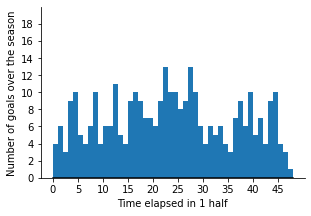

In [28]:
from pylab import rcParams

rcParams["figure.figsize"] = 12 / 2.54, 8 / 2.54

matplotlib.font_manager.FontProperties(family="Helvetica", size=11)

# Set up figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot histogram of shots
plt.hist(the_shots / 60, bins=range(0, 49))
plt.plot([0, 48], [shots_per_min, shots_per_min], color="black")

ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticks(np.arange(0, 48, 5))
ax.set_xlabel("Time elapsed in " + half[0] + " half")
if isgoal == 0:
    ax.set_ylabel("Number of shots over the season")
    ax.set_yticks(np.arange(0, 120, 20))
    ax.set_ylim(0, 130)
else:
    ax.set_ylabel("Number of goals over the season")
    ax.set_yticks(np.arange(0, 20, 2))
    ax.set_ylim(0, 20)


plt.show()


In [29]:
# Save the figure to a pdf
isgoal = 1
if isgoal:
    fig.savefig("Output/TimesOfGoals" + half + ".pdf", dpi=None, bbox_inches="tight")
else:
    fig.savefig("Output/TimesOfShots" + half + ".pdf", dpi=None, bbox_inches="tight")
